Datasets

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
data = iris.data

In [4]:
data.shape

(150, 4)

Example of reshaping data

In [5]:
digits = datasets.load_digits()

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

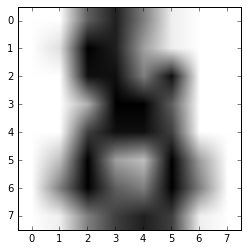

In [8]:
plt.imshow(digits.images[-1], cmap = plt.cm.gray_r)

In [9]:
data = digits.images.reshape((digits.images.shape[0], -1))

In [10]:
data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [11]:
data.shape

(1797, 64)

Classifying Irises

In [12]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

In [13]:
iris_X = iris.data

In [14]:
iris_y = iris.target

In [15]:
np.unique(iris_y)

array([0, 1, 2])

In [16]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [18]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

Linear Model: from regression to sparsity

In [19]:
diabetes = datasets.load_diabetes()

In [20]:
diabetes.data.shape

(442, 10)

In [21]:
diabetes_X_train = diabetes.data[:-20]
diabetes_y_train = diabetes.target[:-20]
diabetes_X_test = diabetes.data[-20:]
diabetes_y_test = diabetes.target[-20:]

In [22]:
from sklearn import linear_model

In [23]:
regr = linear_model.LinearRegression()

In [24]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
regr.coef_

array([  3.03499549e-01,  -2.37639315e+02,   5.10530605e+02,
         3.27736980e+02,  -8.14131709e+02,   4.92814588e+02,
         1.02848452e+02,   1.84606489e+02,   7.43519617e+02,
         7.60951722e+01])

Mean Square Error

In [26]:
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

2004.5676026898223

In [27]:
regr.score(diabetes_X_test, diabetes_y_test)

0.58507530226905713

Shrinkage

In [28]:
X = np.c_[.5, 1].T

In [29]:
X

array([[ 0.5],
       [ 1. ]])

In [30]:
y = [.5, 1]

In [31]:
test = np.c_[0, 2].T

In [32]:
test

array([[0],
       [2]], dtype=int32)

In [33]:
regr = linear_model.LinearRegression()

In [34]:
import matplotlib.pyplot as plt

In [35]:
plt.figure()

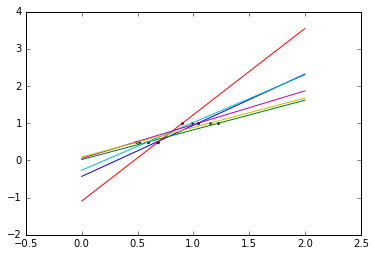

In [36]:
np.random.seed(0)
for _ in range(6):
    this_X = .1* np.random.normal(size = (2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

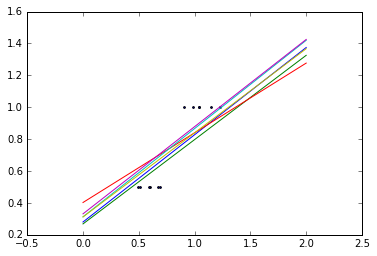

In [37]:
regr = linear_model.Ridge(alpha=.1)
plt.figure()
np.random.seed(0)
for _ in range(6):
    this_X = .1* np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

In [38]:
alphas = np.logspace(-4, -1, 6)

In [39]:
alphas

array([ 0.0001    ,  0.00039811,  0.00158489,  0.00630957,  0.02511886,
        0.1       ])

In [40]:
from __future__ import print_function

In [41]:
print([regr.set_params(alpha = alpha
                      ).fit(diabetes_X_train, diabetes_y_train
                    ).score(diabetes_X_test, diabetes_y_test) for alpha in alphas])

[0.58511106838835303, 0.58520730154446765, 0.58546775406984908, 0.58555120365039148, 0.58307170855541623, 0.57058999437280111]


Sparsity

In [42]:
regr = linear_model.Lasso()
scores =  [regr.set_params(alpha = alpha
                          ).fit(diabetes_X_train, diabetes_y_train)
                        .score(diabetes_X_test, diabetes_y_test)
                      for alpha in alphas]

In [43]:
best_alpha = alphas[scores.index(max(scores))]

In [44]:
best_alpha

0.025118864315095794

In [45]:
regr.alpha = best_alpha

In [46]:
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982    -0.
 -187.19554705   69.38229038  508.66011217   71.84239008]


Classification

In [48]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Support Vector Machines 

In [49]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
svc= svm.SVC(kernel='poly', degree=3)
svc = svm.SVC(kernel = 'rbf')

Model Selection: choosing estimators and their parameters

In [51]:
from sklearn import datasets, svm
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.97999999999999998

In [52]:
x = [1, 2, 3, 4, 5]
x[:-1]

[1, 2, 3, 4]

In [53]:
x[-1:]

[5]

In [54]:
import numpy as np
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()
for k in range(3):
    X_train=list(X_folds)
    X_test=X_train.pop(k)
    X_train=np.concatenate(X_train)
    y_train=list(y_folds)
    y_test =y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))

In [55]:
scores

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

Cross-validation generators

In [56]:
from sklearn.model_selection import KFold, cross_val_score

In [57]:
 X = ["a", "a", "b", "c", "c", "c"]
k_fold = KFold(n_splits=3)
for train_indices, test_indices in k_fold.split(X):
    print('Train %s | Test %s' % (train_indices, test_indices) )

Train [2 3 4 5] | Test [0 1]
Train [0 1 4 5] | Test [2 3]
Train [0 1 2 3] | Test [4 5]


In [58]:
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
        for train, test in k_fold.split(X_digits)]

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

In [59]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1)

array([ 0.93489149,  0.95659432,  0.93989983])

In [60]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold,
                 scoring='precision_macro')

array([ 0.93969761,  0.95911415,  0.94041254])

Grid_search and cross-validated estimators

In [61]:
from sklearn.model_selection import GridSearchCV, cross_val_score


In [62]:
Cs = np.logspace(-6, -1, 10)
Cs

array([  1.00000000e-06,   3.59381366e-06,   1.29154967e-05,
         4.64158883e-05,   1.66810054e-04,   5.99484250e-04,
         2.15443469e-03,   7.74263683e-03,   2.78255940e-02,
         1.00000000e-01])

In [63]:
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=-1)

In [64]:
clf.fit(X_digits[:1000], y_digits[:1000])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
clf.best_score_

0.92500000000000004

In [66]:
clf.best_estimator_.C

0.0077426368268112772

In [69]:
clf.score(X_digits[1000:], y_digits[1000:])

0.94353826850690092

Cross-validation estimators

In [70]:
from sklearn import linear_model, datasets
lasso = linear_model.LassoCV()
diabetes =  datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target
lasso.fit(X_diabetes, y_diabetes)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [71]:
lasso.alpha_

0.012291895087486173

Unsupervised Learning: Seeking Representations of the Data

Clustering: Grouping Observations Together

K-means clustering

In [72]:
from sklearn import cluster, datasets
iris  = datasets.load_iris()
X_iris = iris.data
y_iris  =iris.target
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [73]:
k_means.labels_[::10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [74]:
y_iris[::10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [75]:
import scipy as sp

In [76]:
try:
    face = sp.face(gray=True)
except AttributeError:
    from scipy import misc
    face = misc.face(gray=True)
    

In [77]:
X = face.reshape((-1, 1))
k_means = cluster.KMeans(n_clusters=5, n_init=1)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [78]:
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

In [79]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ..., 
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [80]:
face_compressed

array([[ 112.11564253,  112.11564253,  151.23100509, ...,  112.11564253,
         112.11564253,  151.23100509],
       [  72.97293392,  112.11564253,  112.11564253, ...,  112.11564253,
         151.23100509,  151.23100509],
       [  72.97293392,   72.97293392,  112.11564253, ...,  112.11564253,
         151.23100509,  151.23100509],
       ..., 
       [ 112.11564253,  112.11564253,  112.11564253, ...,  151.23100509,
         151.23100509,  151.23100509],
       [ 112.11564253,  112.11564253,  112.11564253, ...,  151.23100509,
         151.23100509,  151.23100509],
       [ 112.11564253,  112.11564253,  112.11564253, ...,  151.23100509,
         151.23100509,  151.23100509]])

Connectivity-constrained clustering

In [83]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
import scipy as sp

In [85]:
try:
    from scipy.misc import face
    face = face(gray=True)
except ImportError:
    face = scipy.face(gray=True)
    
face = sp.misc.imresize(face, 0.10) / 255.

X = np.reshape(face, (-1, 1))

connectivity = grid_to_graph(*face.shape)

In [86]:
connectivity

<7752x7752 sparse matrix of type '<class 'numpy.int32'>'
	with 38404 stored elements in COOrdinate format>

Feature Agglomeration

In [93]:
digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity,
                                      n_clusters=32)
agglo.fit(X) 

FeatureAgglomeration(affinity='euclidean', compute_full_tree='auto',
           connectivity=<64x64 sparse matrix of type '<class 'numpy.int32'>'
	with 288 stored elements in COOrdinate format>,
           linkage='ward', memory=None, n_clusters=32,
           pooling_func=<function mean at 0x0000000004C99268>)

In [94]:
X_reduced = agglo.transform(X)

In [95]:
X_reduced.shape

(1797, 32)

In [96]:
X_approx = agglo.inverse_transform(X_reduced)

In [97]:
images_approx = np.reshape(X_approx, images.shape)

In [98]:
images_approx

array([[[  0.18181818,   0.18181818,   5.        , ...,   1.        ,
           5.8       ,   0.        ],
        [  0.18181818,   1.5       ,  13.        , ...,  13.        ,
           5.8       ,   0.        ],
        [  0.18181818,   1.5       ,  13.5       , ...,  13.        ,
           5.8       ,   0.        ],
        ..., 
        [  0.18181818,   4.33333333,   9.5       , ...,  12.        ,
           2.33333333,   0.        ],
        [  0.18181818,   0.18181818,  14.        , ...,  12.        ,
           2.33333333,   0.        ],
        [  0.18181818,   0.18181818,   6.        , ...,   0.        ,
           2.33333333,   0.        ]],

       [[  0.        ,   0.        ,   0.        , ...,   5.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   7.5       ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   9.        , ...,   7.5       ,
           0.        ,   0.        ],
        ...,

Decompostions: from a signal to components and laodings

Principle Component Analysis: PCA

In [100]:
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)
x3 = x1 + x2
X = np.c_[x1, x2, x3]

In [101]:
from sklearn import decomposition

In [102]:
pca = decomposition.PCA()

In [103]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [104]:
pca.explained_variance_

array([  3.43292287e+00,   1.21766010e+00,   2.64435402e-32])

In [105]:
pca.n_components = 2

In [106]:
X_reduced = pca.fit_transform(X)
X_reduced.shape

(100, 2)

Independent Component Analysis

In [107]:
import numpy as np
from scipy import signal
time = np.linspace(0, 10, 2000)
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = signal.sawtooth(2 * np.pi * time)

In [108]:
S = np.c_[s1, s2, s3]

In [109]:
S += 0.2 * np.random.normal(size=S.shape)

In [110]:
S /= S.std(axis=0)

In [111]:
A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]])

In [112]:
X= np.dot(S, A.T)
ica = decomposition.FastICA()

In [113]:
S_ = ica.fit_transform(X)
A_ = ica.mixing_.T

In [114]:
np.allclose(X, np.dot(S_, A_) +ica.mean_)

True

In [115]:
ica

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=None, random_state=None, tol=0.0001, w_init=None,
    whiten=True)